<a href="https://colab.research.google.com/github/ZeroGalack/Treinamento-modelo-YOLOv5/blob/main/Treinamento_modelo_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Treinamento YOLOv5**

### **Setup**

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-163-g016e046 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.0/78.2 GB disk)


### ***Executar parte 1 e 2 no PC***

### **1- Aquisição e preparação das imagens para o dataset** 


In [5]:
!pip install DuckDuckGoImages

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import DuckDuckGoImages as ddg

filtro = "caixa de papelão" #Nome da imagens
destino = "../imgs" #Caminho onde as imagens serao salvas


print("Iniciando downloads...")
try:
    ddg.download(filtro, folder=destino, remove_folder=False, parallel=True)
except Exception as e:
    print(e)


print("downloads concluidos")

Iniciando downloads...


  0%|          | 0/302 [00:00<?, ?it/s]

downloads concluidos


### **2 - Etiquetar dataset** 

*   $ git clone https://github.com/tzutalin/labelImg


*   $ pip install pyqt=5


*   $ pip install lxml



*   $ cd labelImg




*   $ python labelImg.py

In [10]:
# Etiquete o dataset e guarde usando a seguinte estrutura:
# 
# --train_data
#   -- images
#       --train
#       --val
#   -- labels
#       --train
#       --val
#
# Separar uma parte para val em images e labels

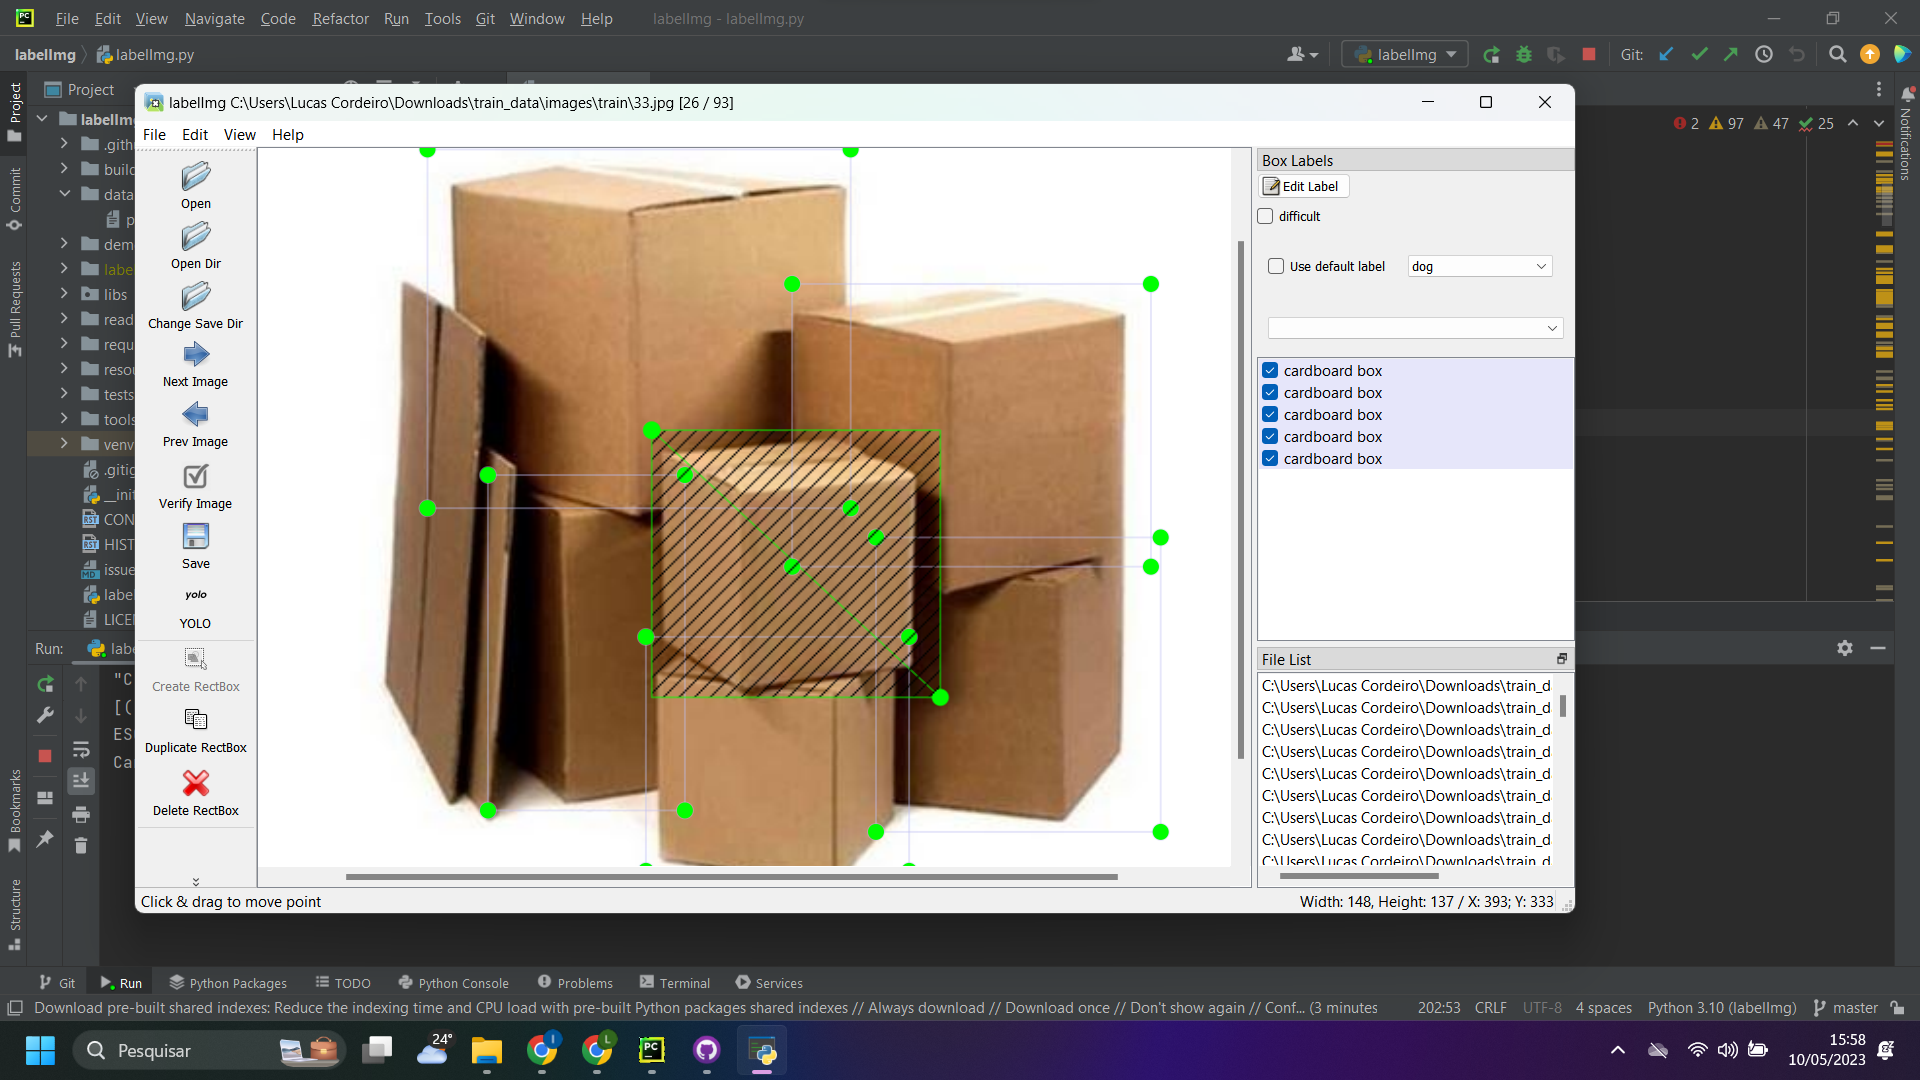

### **Para descompactar um dataset .zip**

In [2]:
!unzip -q ../train_data.zip -d ../

## **3 - Treinamento** 

### **Crie um aruqivo .yaml com as seguintes informações:**

In [6]:
#   path: ../train_data  # dataset root dir
#   train: ../train_data/images/train/  # train images (relative to 'path') 128 images
#   val: ../train_data/images/val/  # val images (relative to 'path') 128 images
#   test:  # test images (optional)
#   
#   # Classes
#   nc: 1  # number of classes
#   names: ['caixa']  # class names
#
#
# Adicione o arquivo .yaml em .../yolov5/data
# Tirar comentarios!!!

### **Executar treinamento:**

In [4]:
!python train.py --img 640 --batch 4 --epochs 30 --data customdata.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=customdata.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-163-g016e046 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0

### **Visualizar resultado:**

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=../caixa.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-163-g016e046 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/caixa.jpg: 640x384 8 cardboard boxs, 38.1ms
Speed: 0.4ms pre-process, 38.1ms inference, 92.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


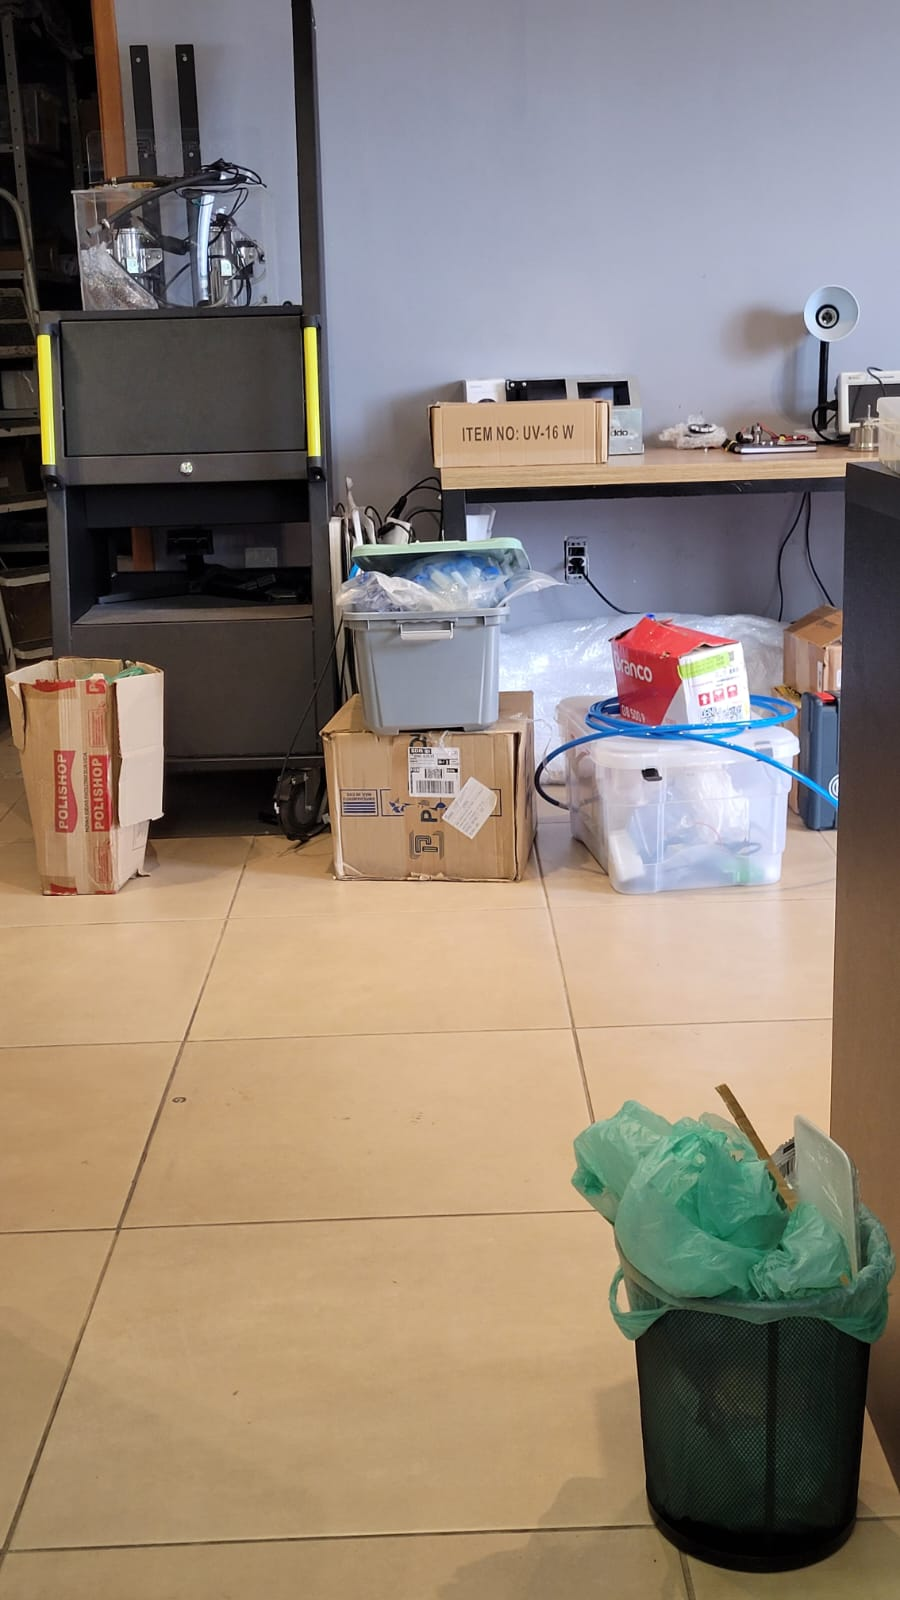

In [9]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.35 --source "../caixa.jpg"
display.Image(filename='../caixa.jpg', width=600)

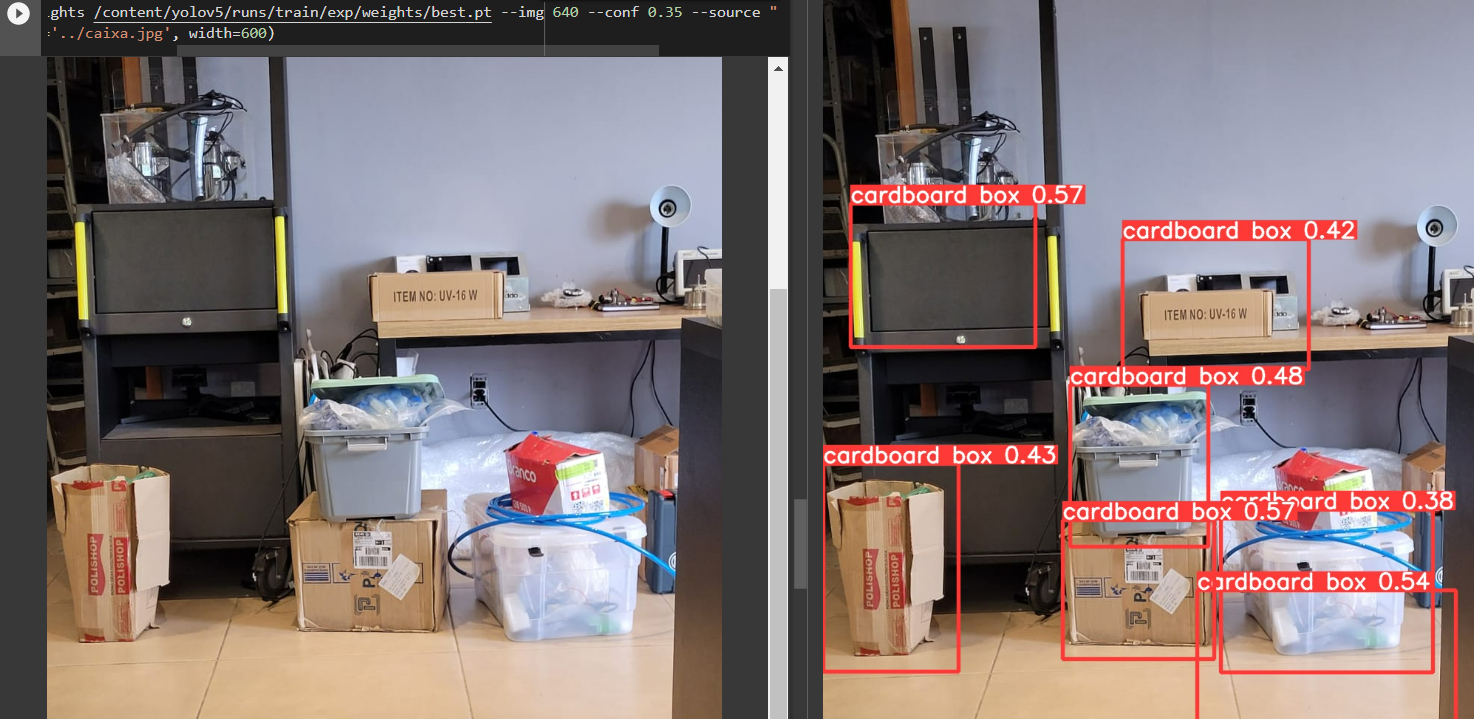

## **Referencias:**

https://github.com/ultralytics/yolov5